Nowadays, marketing expenses in banking industry are massive. Meaning that it is essential to optimise the marketing strategies and improve the effectivity. Understanding the needs of the customers might drive better marketing plannings, smarter product development and higher customer satisfaction. 

I am going to analyse a sample dataset including the data and outcome of different loans managed through phone calls and I will try to reply the upcoming questions:

1. Analyse if the bank adresses its campaigns in a properly distributed way or; however, it is targeting specific segments.
2. Identify those customers with highest converstion rate.
3. Justify if the marketing strategy is appropriate or, in case it is not, suggest an alternative way.

# Data Load

In [1]:
# Import the libreries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import os
import warnings
from scipy.stats import zscore
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Upload the dataset
link = ('C:/Users/Pablo/anaconda/anaconda3/datasets/telemarketing_case/bank-full.csv')
df = pd.read_csv(link, sep = ';')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


# Data Preparation

In [20]:
# Create a dictionaty to change column names with their description
dicc = pd.read_excel('C:/Users/Pablo/anaconda/anaconda3/datasets/telemarketing_case/dicc.xlsx', header = 0, index_col = 0).to_dict()


In [ ]:
df_bu = df_n.rename(columns = dicc['Description'])

In [4]:
# Remove certain unnecessary columns
df_n = df.drop(['contact', 'default', 'pdays', 'previous'], axis = 1)
df_n.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,2143,yes,no,5,may,261,1,unknown,no
1,44,technician,single,secondary,29,yes,no,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,5,may,92,1,unknown,no
4,33,unknown,single,unknown,1,no,no,5,may,198,1,unknown,no


In [5]:
# Remove those rows where Previous Outcome is other
condicion = df_n['poutcome'] == 'other'
df_n_2 = df_n.drop(df_n[condicion].index, axis = 0)

In [6]:
# Change the column months from label to number
for i in [df_n_2]:
    i.loc[i['month'] == 'jan', 'month_int'] = 1
    i.loc[i['month'] == 'feb', 'month_int'] = 2
    i.loc[i['month'] == 'mar', 'month_int'] = 3
    i.loc[i['month'] == 'apr', 'month_int'] = 4
    i.loc[i['month'] == 'may', 'month_int'] = 5
    i.loc[i['month'] == 'jun', 'month_int'] = 6
    i.loc[i['month'] == 'jul', 'month_int'] = 7
    i.loc[i['month'] == 'aug', 'month_int'] = 8
    i.loc[i['month'] == 'sep', 'month_int'] = 9
    i.loc[i['month'] == 'oct', 'month_int'] = 10
    i.loc[i['month'] == 'nov', 'month_int'] = 11
    i.loc[i['month'] == 'dec', 'month_int'] = 12
    
df_n_3 = df_n_2.drop('month', axis = 1)

In [7]:
# Remove the calls under 5s
cond = df_n_3['duration'] < 5
df_n_3 = df_n_3.drop(df_n_3[cond].index, axis = 0)

In [8]:
# Convert the duration column to minutes
df_n_3['duration'] = df_n_3['duration'].apply(lambda x: x/60).round(2)

In [9]:
# Remove the people with abnormal balance
from scipy.stats import zscore
df_n_3['balance_outliers'] = zscore(df_n_3['balance'])
condicion = (df_n_3['balance_outliers'] > 3) | (df_n_3['balance_outliers'] < -3)
df_n_4 = df_n_3.drop(df_n_3[condicion].index, axis = 0, inplace = False)
df_n_4.head()

,age,job,marital,education,balance,housing,loan,day,duration,campaign,poutcome,y,month_int,balance_outliers
0,58,management,married,tertiary,2143,yes,no,5,4.35,1,unknown,no,5.0,0.259327
1,44,technician,single,secondary,29,yes,no,5,2.52,1,unknown,no,5.0,-0.438209
2,33,entrepreneur,married,secondary,2,yes,yes,5,1.27,1,unknown,no,5.0,-0.447118
3,47,blue-collar,married,unknown,1506,yes,no,5,1.53,1,unknown,no,5.0,0.049143
4,33,unknown,single,unknown,1,no,no,5,3.30,1,unknown,no,5.0,-0.447448


In [10]:
df_n_3 = df_n_4.drop('balance_outliers', axis = 1)

In [18]:
df_n_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42630 entries, 0 to 45209
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        42630 non-null  int64  
 1   job        42630 non-null  object 
 2   marital    42630 non-null  object 
 3   education  42630 non-null  object 
 4   balance    42630 non-null  int64  
 5   housing    42630 non-null  object 
 6   loan       42630 non-null  object 
 7   day        42630 non-null  int64  
 8   duration   42630 non-null  float64
 9   campaign   42630 non-null  int64  
 10  poutcome   42630 non-null  object 
 11  y          42630 non-null  object 
 12  month_int  42630 non-null  float64
 13  age_group  42630 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 4.9+ MB


# Data Analysis and Visualization

Statistical analysis of the numerical variables:

In [27]:
stat_analy = df_n_3.rename(columns = dicc['Description']).describe()
stat_analy

,Age,Current account balance,Day of contact,Duration of the call,Number of calls,month_int
count,42630.000000,42630.000000,42630.000000,42630.000000,42630.000000,42630.000000
mean,40.940676,1080.126859,15.862913,4.305393,2.777973,6.159489
std,10.577730,1717.869891,8.329394,4.297494,3.139614,2.361084
min,18.000000,-6847.000000,1.000000,0.080000,1.000000,1.000000
25%,33.000000,66.000000,8.000000,1.720000,1.000000,5.000000
50%,39.000000,425.000000,16.000000,3.000000,2.000000,6.000000
75%,48.000000,1342.000000,21.000000,5.300000,3.000000,8.000000
max,95.000000,10443.000000,31.000000,81.970000,63.000000,12.000000


## Visualize the number of phone calls by:

### - Age

In [11]:
# Creating age groups
for i in [df_n_3]:
    i.loc[i['age'] <= 20, 'age_group'] = '1. below 20'
    i.loc[(i['age'] > 20) & (i['age'] <= 30), 'age_group'] = '2. 20-30'
    i.loc[(i['age'] > 30) & (i['age'] <= 40), 'age_group'] = '3. 30-40'
    i.loc[(i['age'] > 40) & (i['age'] <= 50), 'age_group'] = '4. 40-50'
    i.loc[(i['age'] > 50) & (i['age'] <= 65), 'age_group'] = '5. 50-65'
    i.loc[i['age'] > 65, 'age_group'] = '6. over 65'

In [12]:
# Checking the conversion rate by age
conv_age = pd.crosstab(df_n_3['y'], df_n_3['age_group']).apply(lambda x: x/x.sum()*100)
conv_age = conv_age.transpose()
conv_age = pd.DataFrame(conv_age)

Text(0.5, 1.0, 'Conversion rate by age')

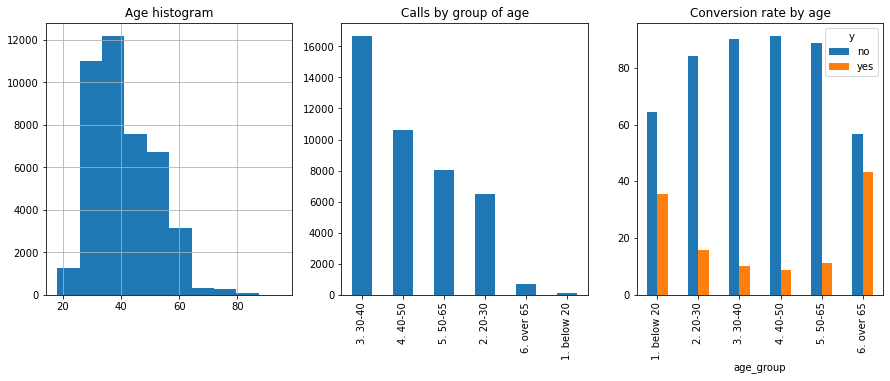

In [57]:
fig, axes = plt.subplots(1, 3,figsize =(15,5))

df_n_3['age'].hist(ax = axes[0])
axes[0].set_title('Age histogram')

df_n_3['age_group'].value_counts().plot(kind = 'bar', ax = axes[1])
axes[1].set_title('Calls by group of age')

conv_age.plot(kind = 'bar', ax = axes[2])
axes[2].set_title('Conversion rate by age')

### - Job profile

In [14]:
emp_conv = pd.crosstab(df_n_3['y'], df_n_3['job']).apply(lambda x: x/x.sum()*100)
emp_conv = emp_conv.transpose()

Text(0.5, 1.0, 'Conversion rate by type of employee')

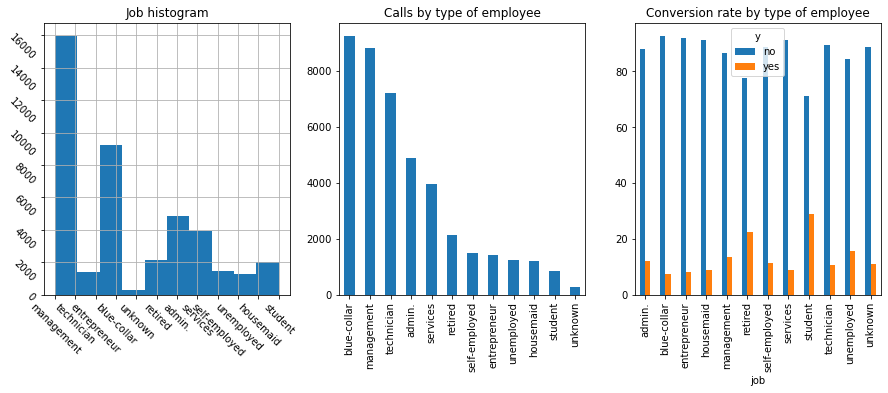

In [15]:
fig2, axes2 = plt.subplots(1, 3, figsize = (15,5))

df_n_3['job'].hist(ax = axes2[0])
axes2[0].set_title('Job histogram')
axes2[0].tick_params(labelrotation=-45)

df_n_3['job'].value_counts().plot(kind = 'bar', ax = axes2[1])
axes2[1].set_title('Calls by type of employee')

emp_conv.plot(kind = 'bar', ax = axes2[2])
axes2[2].set_title('Conversion rate by type of employee')

### - Balance

In [39]:
for i in [df_n_3]:
    i.loc[i['balance'] <= 0, 'balance_group'] = '1. No balance'
    i.loc[(i['balance'] > 0) & (i['balance'] <= 1000), 'balance_group'] = '2. Low balance'
    i.loc[(i['balance'] > 1000) & (i['balance'] <= 5000), 'balance_group'] = '3. Average balance'
    i.loc[i['balance'] > 5000, 'balance_group'] = '4. High balance'

In [44]:
bal_conv = pd.crosstab(df_n_3['y'], df_n_3['balance_group']).apply(lambda x: x/x.sum()*100)
bal_conv = bal_conv.transpose()

Text(0.5, 1.0, 'Conversion rate per balance group')

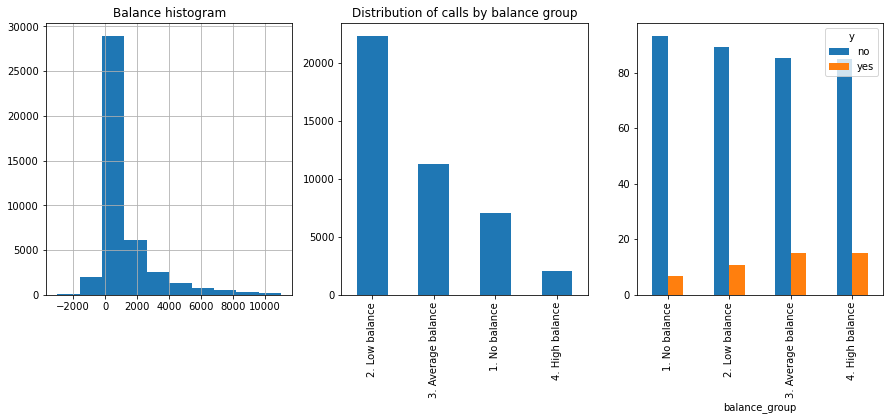

In [54]:
fig3, axes3 = plt.subplots(1,3,figsize = (15,5))

df_n_3['balance'].hist(range = (-3000, 11000), ax = axes3[0])
axes3[0].set_title('Balance histogram')

df_n_3['balance_group'].value_counts().plot(kind = 'bar', ax = axes3[1])
axes3[1].set_title('Distribution of calls by balance group')

bal_conv.plot(kind = 'bar', ax = axes3[2])
axes[2].set_title('Conversion rate per balance group')

### - By age group and balance

In [77]:
for i in [df_n_3]:
    i.loc[i['y'] == 'yes', 'response_binary'] = 1
    i.loc[i['y'] == 'no', 'response_binary'] = 0
    

In [89]:
age_bal_conv = pd.DataFrame(df_n_3.groupby(['age_group', 'balance_group'])['y'].count())
age_bal_conv2 = pd.DataFrame(df_n_3.groupby(['age_group', 'balance_group'])['response_binary'].sum())
age_bal_rate = age_bal_conv2['response_binary'] / age_bal_conv['y']*100
age_bal_rate = age_bal_rate.unstack()

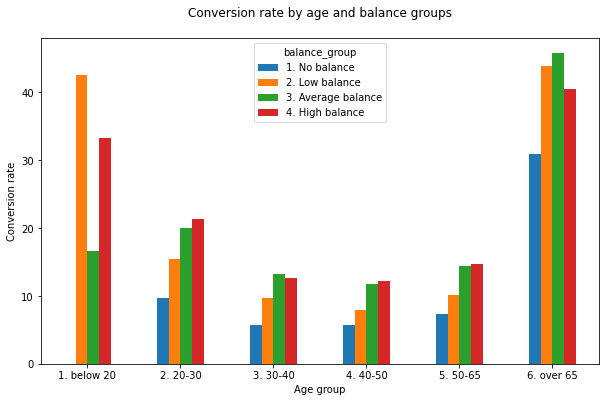

In [113]:
age_bal_rate.plot(kind = 'bar', figsize = (10,6))

plt.title('Conversion rate by age and balance groups'+'\n')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Age group')
plt.ylabel('Conversion rate')
plt.show()

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

# Answer to question 1 and 2

Reached this point, we can clearly respond both questions:
- Regarding the distribution of the calls, the data reflects a concentration of calls in:
    1. People between 30 - 40 years old.
    2. People whose employment is as a blue-collar, as a manager or as a techncian.
    3. People with low balance
- Regarding the customers with the highest conversion rate, the data reflects that the most convertible customers are:
    1. People below 20 years old and over 65 years old.
    2. People whose employment is student or retired (related with previous point)
    3. People with average and high balance
    
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

## Relate time length and amount of calls with outcome

Text(50, 10, 'Below 5 calls the conversion rate increases')

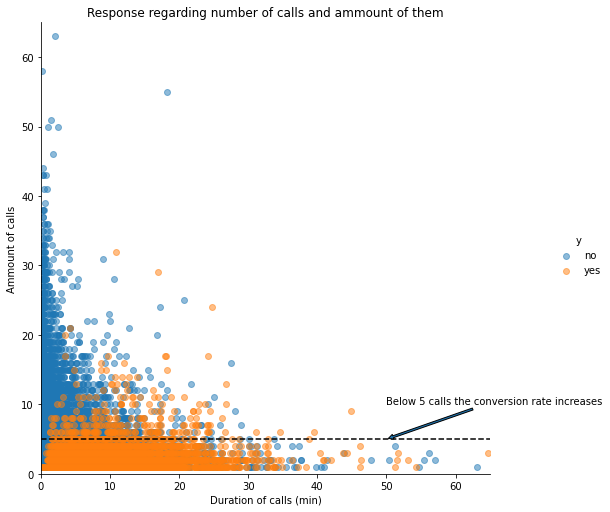

In [277]:
sns.lmplot(x = 'duration', 
           y = 'campaign', 
           data = df_n_3, 
           hue = 'y',
           fit_reg = False,
           scatter_kws = {'alpha' : 0.5},
           height = 7
          )
plt.axis([0,65,0,65])
plt.xlabel('Duration of calls (min)')
plt.ylabel('Ammount of calls')
plt.title('Response regarding number of calls and ammount of them')
plt.axhline(5, linestyle = '--', color = 'black')
plt.annotate('Below 5 calls the conversion rate increases', xytext = (50,10), arrowprops = dict(arrowstyle = 'simple'), xy = (50,5))

## Relación entre variables

In [109]:
df_rel = df_n_3[['y', 'age', 'job', 'marital', 'education', 'balance', 'duration', 'campaign']]

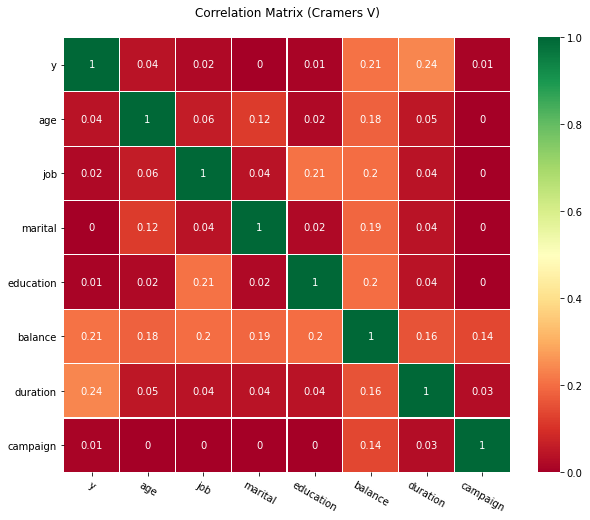

In [110]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows= []

for var1 in df_rel:
    col = []
    for var2 in df_rel:
        cramers =cramers_V(df_rel[var1], df_rel[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df_new = pd.DataFrame(cramers_results, columns = df_rel.columns, index = df_rel.columns)

cor_plot = sns.heatmap(df_new ,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix (Cramers V)'+'\n')
plt.show()

## Evolución temporal de las conversiones frente a las llamadas

In [253]:
month_resp = pd.crosstab(df_n_3['y'], df_n_3['month_int']).apply(lambda x: x/x.sum()*100)
month_resp = month_resp.transpose()
month_yes = month_resp['yes']

In [249]:
month_calls = df_n_3['month_int'].value_counts()
month_calls = month_calls.sort_index()
month_calls['%Contact'] = month_calls*100/month_calls.sum()
month_calls = month_calls['%Contact']

In [274]:
plot = pd.DataFrame([month_yes, month_calls])
plot = plot.transpose()
dicc2 = {'yes':'% Subscription', 'month_int': '% Contacted'}
plot = plot.rename(columns = dicc2)

Text(0, 0.5, '% Of calls / % Of accepted loans')

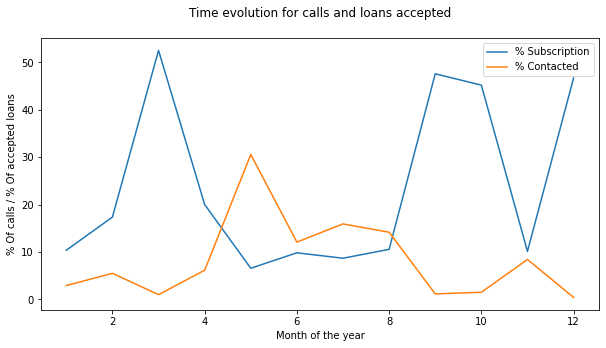

In [276]:
plot_month = plot[['% Subscription', '% Contacted']].plot(figsize = (10,5))
plt.title('Time evolution for calls and loans accepted'+'\n')
plt.xlabel('Month of the year')
plt.ylabel('% Of calls / % Of accepted loans')

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

# Answer to question 3

The results obtained evidence different defficiencies in the marketing strategy of the bank:
- The target customer does not match with the highest convertion rate customer. 
- The amount of calls is not optimised to maximise the convertion rate. The calls should never excede 5.

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________